In [20]:
import numpy as np
import h5py
from nnSampleVerification import sdfs, verifMethods, plotter

In [21]:
# Mean vector
mean = np.array([0, 0])

# Covariance matrix
cov = np.array([[0.7, 0.25], [0.25, 0.5]])

beta = 0.1
Delta = 1-0.987
verif1 = verifMethods.scenario(Delta,beta)
print(verif1.num_samples)

# Import TaxiRun h5 using pandas
f = h5py.File('./TaxiRunFixedCopy.h5', 'r')

y_pos = np.zeros((verif1.num_samples,1))

for i in np.arange(0,verif1.num_samples):

    run_num = 'run_' + str(i+1)
    group = f.get(run_num)
    y_pos[i] = group.get('cte')[-1]


# Generate samples
samples = y_pos
# Add samples to the verifier
verif1.addSamples(samples)

# Center of the norm-ball
center = np.array(0.0)
zero_radius_fixed = np.array(1)
normSDF = sdfs.norm(center,zero_radius_fixed,norm=1)

# Add SDF: 
verif1.addSpecification(normSDF)

levelSetZeroRadius = verif1.findLevelSet()
print(levelSetZeroRadius)


402
1.2520071507626938


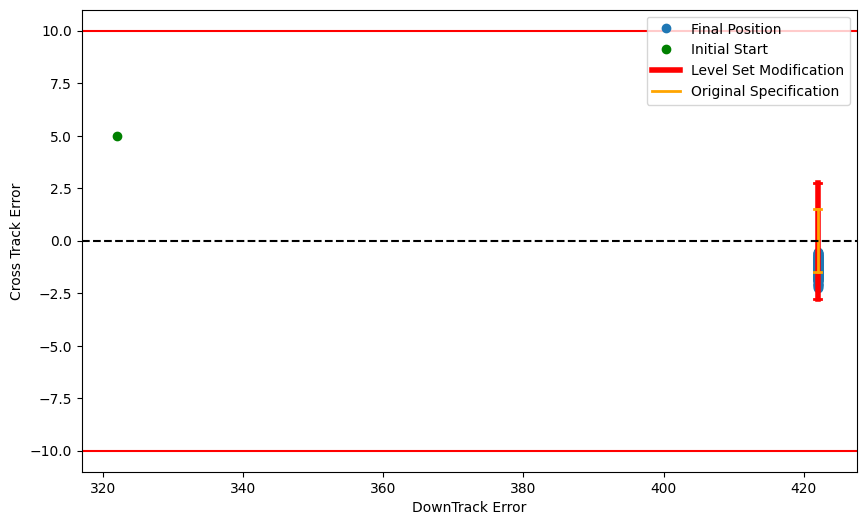

AttributeError: 'scenario' object has no attribute 'empiricalCDFGen'

In [22]:
import matplotlib.pyplot as plt

# Create a plot
plt.figure(figsize=(10, 6))

# Plot the samples
plt.plot(422*np.ones(samples.shape[0]),samples, 'o', label='Final Position')
plt.plot(322,5, 'og', label='Initial Start')

plt.plot([422, 422], [-1.5-levelSetZeroRadius, 1.5+levelSetZeroRadius], '-', color='red', linewidth=4, label='Level Set Modification')
plt.plot([421.5, 422.5], [1.5+levelSetZeroRadius, 1.5+levelSetZeroRadius], '-', color='red', linewidth=2)
plt.plot([421.5, 422.5], [-1.5-levelSetZeroRadius, -1.5-levelSetZeroRadius], '-', color='red',linewidth=2)
# Add box and whisker like lines at y = ±1.5 and x = 422
plt.plot([422, 422], [-1.5, 1.5], '-', color='orange', linewidth=2)
plt.plot([421.5, 422.5], [1.5, 1.5], '-', color='orange', linewidth=2)
plt.plot([421.5, 422.5], [-1.5, -1.5], '-', color='orange',linewidth=2, label='Original Specification')




# Add horizontal lines at 10 and -10
plt.axhline(y=10, color='r', linestyle='-')
plt.axhline(y=-10, color='r', linestyle='-')
plt.axhline(y=0, color='k', linestyle='--')

# Add labels and title
plt.xlabel('DownTrack Error')
plt.ylabel('Cross Track Error')

plt.legend(loc='best')

# Show the plot
plt.show()

evalPts = np.linspace(-10,20,100)
plotter.histogramPlot(verif1.empiricalCDFGen,evalPts,levelSetZeroRadius,levelProb)